# Telecom Churn Case Study:

### Group Details:

### Author ::

### 1. Prachi Jain

### 2. Sachin Kumar

### Date :: 29/12/2019

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# to avoid plt.show()
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

# 1. Reading data

In [2]:
telecom_Data = pd.read_csv("C:/Users/sachin.kumar/Desktop/python/Telecom Churn Case Study/telecom_churn_data.csv", low_memory = False)

In [3]:
telecom_Data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom_Data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [5]:
telecom_Data.shape

(99999, 226)

In [6]:
telecom_Data.describe(include = 'all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [7]:
#Missing Value ratio in each columns
(telecom_Data.isnull().sum()*100/telecom_Data.shape[0]).sort_values(ascending= False)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

In [8]:
telecom_Data.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

# 2.  Data Cleaning

In [9]:
# Drop cols with single value since these cols have zero variance.

unique_stats = pd.DataFrame(telecom_Data.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
unique_stats[unique_stats['nunique'] == 1]

,feature,nunique
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
8,last_date_of_month_9,1
61,std_og_t2c_mou_6,1
62,std_og_t2c_mou_7,1


In [10]:
telecom_Data.drop(columns = list(unique_stats[unique_stats['nunique'] == 1]['feature']),inplace=True)

In [11]:
telecom_Data.shape

(99999, 210)

In [12]:
# Checking the data for the months 6, 7, 8 and 9by extracting month's data into individual files.

# df_6=telecom_Data.filter(regex='_6$',axis=1)
# df_6.head()
# df_6.to_csv('Teleco6.csv', header=True, index=False)
# df_7=telecom_Data.filter(regex='_7$',axis=1)
# df_7.head()
# df_7.to_csv('Telecom7.csv', header=True, index=False)
# df_8=telecom_Data.filter(regex='_8$',axis=1)
# df_8.head()
# df_8.to_csv('Telecom8.csv', header=True, index=False)
# df_9=telecom_Data.filter(regex='_9$',axis=1)
# df_9.head()
# df_9.to_csv('Telecom9.csv', header=True, index=False)

#### Looking at the data for every month, it can be concluded that below cols have value based on "date_of_last_rech_data_6". If the date of last recharge is non zero then there is value populated for all the cols mentioned below. Therfore when the user has not recharged data pack, all these cols will have zero value.
fb_user_6
arpu_3g_6
arpu_2g_6
max_rech_data_6
count_rech_2g_6
count_rech_3g_6
night_pck_user_6
total_rech_data_6
av_rech_amt_data_6

#### Similar is the case for 7, 8 and 9 months.

In [13]:
# Imputing the cols with approx 75% missing values with zero.
categorical_vars = ["fb_user_6", "arpu_3g_6", "arpu_2g_6", "max_rech_data_6", "count_rech_2g_6", "count_rech_3g_6", "night_pck_user_6", "total_rech_data_6", "av_rech_amt_data_6",
"fb_user_7", "arpu_3g_7", "arpu_2g_7", "max_rech_data_7", "count_rech_2g_7", "count_rech_3g_7", "night_pck_user_7", "total_rech_data_7", "av_rech_amt_data_7",
"fb_user_8", "arpu_3g_8", "arpu_2g_8", "max_rech_data_8", "count_rech_2g_8", "count_rech_3g_8", "night_pck_user_8", "total_rech_data_8", "av_rech_amt_data_8",
"fb_user_9", "arpu_3g_9", "arpu_2g_9", "max_rech_data_9", "count_rech_2g_9", "count_rech_3g_9", "night_pck_user_9", "total_rech_data_9", "av_rech_amt_data_9",
]
for i in categorical_vars:
    telecom_Data[i].fillna(value=0,inplace=True)

In [14]:
telecom_Data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1

In [15]:
# Checking the missing Value ratio again
(telecom_Data.isnull().sum()*100/telecom_Data.shape[0]).sort_values(ascending= False)

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_9    74.077741
date_of_last_rech_data_8    73.660737
std_ic_mou_9                 7.745077
std_og_t2t_mou_9             7.745077
loc_og_t2m_mou_9             7.745077
loc_ic_t2m_mou_9             7.745077
loc_og_t2f_mou_9             7.745077
loc_og_t2c_mou_9             7.745077
loc_og_mou_9                 7.745077
isd_ic_mou_9                 7.745077
std_og_t2f_mou_9             7.745077
ic_others_9                  7.745077
std_og_t2m_mou_9             7.745077
loc_ic_t2f_mou_9             7.745077
loc_ic_t2t_mou_9             7.745077
std_og_mou_9                 7.745077
og_others_9                  7.745077
isd_og_mou_9                 7.745077
loc_og_t2t_mou_9             7.745077
spl_ic_mou_9                 7.745077
spl_og_mou_9                 7.745077
std_ic_t2t_mou_9             7.745077
std_ic_t2m_mou_9             7.745077
onnet_mou_9                  7.745077
offnet_mou_9

In [16]:
# Convert date columns to datetime format: date_of_last_rech_6, date_of_last_rech_data_6
date_cols=["date_of_last_rech_6","date_of_last_rech_data_6",
           "date_of_last_rech_7","date_of_last_rech_data_7",
           "date_of_last_rech_8","date_of_last_rech_data_8",
           "date_of_last_rech_9","date_of_last_rech_data_9",
          ]
for col in date_cols:
    telecom_Data[col] = pd.to_datetime(telecom_Data[col])
    
telecom_Data[date_cols].head()

,date_of_last_rech_6,date_of_last_rech_data_6,date_of_last_rech_7,date_of_last_rech_data_7,date_of_last_rech_8,date_of_last_rech_data_8,date_of_last_rech_9,date_of_last_rech_data_9
0,2014-06-21,2014-06-21,2014-07-16,2014-07-16,2014-08-08,2014-08-08,2014-09-28,NaT
1,2014-06-29,NaT,2014-07-31,2014-07-25,2014-08-28,2014-08-10,2014-09-30,NaT
2,2014-06-17,NaT,2014-07-24,NaT,2014-08-14,NaT,2014-09-29,2014-09-17
3,2014-06-28,NaT,2014-07-31,NaT,2014-08-31,NaT,2014-09-30,NaT
4,2014-06-26,2014-06-04,2014-07-28,NaT,2014-08-09,NaT,2014-09-28,NaT


In [17]:
# From data we can infer that the cols with missing values can be imputed with 0 since the customer has not recharged at all or recharged either the data or the calling packs only.
c = telecom_Data.columns.difference(date_cols)
for i in c:
    telecom_Data[i].fillna(value=0,inplace=True)
telecom_Data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,NaT,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,21

In [18]:
# Checking the missing Value ratio again
(telecom_Data.isnull().sum()*100/telecom_Data.shape[0]).sort_values(ascending= False)

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_9    74.077741
date_of_last_rech_data_8    73.660737
date_of_last_rech_9          4.760048
date_of_last_rech_8          3.622036
date_of_last_rech_7          1.767018
date_of_last_rech_6          1.607016
og_others_6                  0.000000
total_og_mou_8               0.000000
total_og_mou_7               0.000000
total_og_mou_6               0.000000
og_others_9                  0.000000
og_others_8                  0.000000
og_others_7                  0.000000
sep_vbc_3g                   0.000000
spl_og_mou_9                 0.000000
std_og_mou_7                 0.000000
spl_og_mou_8                 0.000000
spl_og_mou_7                 0.000000
spl_og_mou_6                 0.000000
isd_og_mou_9                 0.000000
isd_og_mou_8                 0.000000
isd_og_mou_7                 0.000000
isd_og_mou_6                 0.000000
std_og_mou_9                 0.000000
total_og_mou

# 3. Calculate Total_Recharge_Amount from 6th and 7th Month total_rech_amt

In [19]:
telecom_Data['total_recharge_amount'] = telecom_Data['total_rech_amt_6'] + telecom_Data['total_rech_amt_7']

In [20]:
telecom_Data['total_recharge_amount'].describe(percentiles = [0.7,.75])

count    99999.000000
mean       650.477585
std        741.666932
min          0.000000
50%        458.000000
70%        737.000000
75%        838.000000
max      75525.000000
Name: total_recharge_amount, dtype: float64

# 2. Filter High Value Customer from data frame

In [21]:
telecomDataHigh = telecom_Data[telecom_Data['total_recharge_amount'] >= 737].reset_index(drop=True)
telecomDataHigh.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_amount
0,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,2014-06-27,2014-07-25,2014-08-26,2014-09-30,0,0,779,0,NaT,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [22]:
telecomDataHigh.shape

(30011, 211)

# 3. Tag churners and remove attributes of the churn phase

In [23]:
telecomDataHigh['is_churn'] = np.where(
                            ((telecomDataHigh['total_ic_mou_9'] == 0.00) | (telecomDataHigh['total_og_mou_9'] == 0.00))
                            & ((telecomDataHigh['vol_2g_mb_9'] == 0.00) | (telecomDataHigh['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )
        
telecomDataHigh.head()     
    

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_amount,is_churn
0,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,2014-06-27,2014-07-25,2014-08-26,2014-09-30,0,0,779,0,NaT,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [24]:
telecomDataHigh['is_churn'].value_counts()

0    26964
1     3047
Name: is_churn, dtype: int64

In [25]:
round(100*telecomDataHigh['is_churn'].value_counts()/telecomDataHigh.shape[0],2)

0    89.85
1    10.15
Name: is_churn, dtype: float64

#### Clearly this case is that of imbalance case.

In [26]:
# Removing the 9th month data for prediction.
telecomDataHigh.drop(telecomDataHigh.filter(regex='_9$', axis = 1).columns, axis=1,inplace=True)

In [27]:
telecomDataHigh.shape

(30011, 161)

In [28]:
telecomDataHigh.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 161 columns):
mobile_number               30011 non-null int64
arpu_6                      30011 non-null float64
arpu_7                      30011 non-null float64
arpu_8                      30011 non-null float64
onnet_mou_6                 30011 non-null float64
onnet_mou_7                 30011 non-null float64
onnet_mou_8                 30011 non-null float64
offnet_mou_6                30011 non-null float64
offnet_mou_7                30011 non-null float64
offnet_mou_8                30011 non-null float64
roam_ic_mou_6               30011 non-null float64
roam_ic_mou_7               30011 non-null float64
roam_ic_mou_8               30011 non-null float64
roam_og_mou_6               30011 non-null float64
roam_og_mou_7               30011 non-null float64
roam_og_mou_8               30011 non-null float64
loc_og_t2t_mou_6            30011 non-null float64
loc_og_t2t_mou_7         

# 4. Derive new columns

In [29]:
telecomDataHigh["mobile_number"].unique().shape

(30011,)

In [30]:
# Mobile number is unique so it can be dropped
telecomDataHigh.drop("mobile_number",axis=1,inplace=True)

In [31]:
# the cols with month in col names like aug_vbc_3g
telecomDataHigh.rename(columns={"aug_vbc_3g":"vbc_3g_8"},inplace=True)
telecomDataHigh.rename(columns={"jul_vbc_3g":"vbc_3g_7"},inplace=True)
telecomDataHigh.rename(columns={"jun_vbc_3g":"vbc_3g_6"},inplace=True)
# dropping the 9th month col
telecomDataHigh.drop("sep_vbc_3g",axis=1,inplace=True)
telecomDataHigh.shape

(30011, 159)

In [32]:
# To get the aggregate values for outgoing and incoming calls and data
telecomDataHigh["loc_og_t2t_t2m_t2f_mou_6"]=telecomDataHigh["loc_og_mou_6"] - telecomDataHigh["loc_og_t2c_mou_6"]
telecomDataHigh["loc_og_t2t_t2m_t2f_mou_7"]=telecomDataHigh["loc_og_mou_7"] - telecomDataHigh["loc_og_t2c_mou_7"]
telecomDataHigh["loc_og_t2t_t2m_t2f_mou_8"]=telecomDataHigh["loc_og_mou_8"] - telecomDataHigh["loc_og_t2c_mou_8"]

telecomDataHigh.drop(["loc_og_t2t_mou_6","loc_og_t2m_mou_6","loc_og_t2f_mou_6"],axis=1, inplace=True)
telecomDataHigh.drop(["loc_og_t2t_mou_7","loc_og_t2m_mou_7","loc_og_t2f_mou_7"],axis=1, inplace=True)
telecomDataHigh.drop(["loc_og_t2t_mou_8","loc_og_t2m_mou_8","loc_og_t2f_mou_8"],axis=1, inplace=True)

In [33]:
telecomDataHigh.drop(["loc_ic_t2t_mou_6","loc_ic_t2m_mou_6","loc_ic_t2f_mou_6"],axis=1, inplace=True)
telecomDataHigh.drop(["loc_ic_t2t_mou_7","loc_ic_t2m_mou_7","loc_ic_t2f_mou_7"],axis=1, inplace=True)
telecomDataHigh.drop(["loc_ic_t2t_mou_8","loc_ic_t2m_mou_8","loc_ic_t2f_mou_8"],axis=1, inplace=True)

In [34]:
telecomDataHigh.drop(["std_og_t2t_mou_6","std_og_t2m_mou_6","std_og_t2f_mou_6"],axis=1, inplace=True)
telecomDataHigh.drop(["std_og_t2t_mou_7","std_og_t2m_mou_7","std_og_t2f_mou_7"],axis=1, inplace=True)
telecomDataHigh.drop(["std_og_t2t_mou_8","std_og_t2m_mou_8","std_og_t2f_mou_8"],axis=1, inplace=True)

In [35]:
telecomDataHigh.drop(["std_ic_t2t_mou_6","std_ic_t2m_mou_6","std_ic_t2f_mou_6"],axis=1, inplace=True)
telecomDataHigh.drop(["std_ic_t2t_mou_7","std_ic_t2m_mou_7","std_ic_t2f_mou_7"],axis=1, inplace=True)
telecomDataHigh.drop(["std_ic_t2t_mou_8","std_ic_t2m_mou_8","std_ic_t2f_mou_8"],axis=1, inplace=True)

In [36]:
telecomDataHigh["count_rech_data_6"]=telecomDataHigh["count_rech_2g_6"] + telecomDataHigh["count_rech_3g_6"]
telecomDataHigh["count_rech_data_7"]=telecomDataHigh["count_rech_2g_7"] + telecomDataHigh["count_rech_3g_7"]
telecomDataHigh["count_rech_data_8"]=telecomDataHigh["count_rech_2g_8"] + telecomDataHigh["count_rech_3g_8"]

telecomDataHigh.drop(["count_rech_2g_6","count_rech_3g_6"],axis=1, inplace=True)
telecomDataHigh.drop(["count_rech_2g_7","count_rech_3g_7"],axis=1, inplace=True)
telecomDataHigh.drop(["count_rech_2g_8","count_rech_3g_8"],axis=1, inplace=True)

In [37]:
telecomDataHigh["vol_data_mb_6"]=telecomDataHigh["vol_2g_mb_6"] + telecomDataHigh["vol_3g_mb_6"]
telecomDataHigh["vol_data_mb_7"]=telecomDataHigh["vol_2g_mb_7"] + telecomDataHigh["vol_3g_mb_7"]
telecomDataHigh["vol_data_mb_8"]=telecomDataHigh["vol_2g_mb_8"] + telecomDataHigh["vol_3g_mb_8"]

telecomDataHigh.drop(["vol_2g_mb_6","vol_3g_mb_6"],axis=1, inplace=True)
telecomDataHigh.drop(["vol_2g_mb_7","vol_3g_mb_7"],axis=1, inplace=True)
telecomDataHigh.drop(["vol_2g_mb_8","vol_3g_mb_8"],axis=1, inplace=True)

In [38]:
telecomDataHigh["arpu_data_6"]=telecomDataHigh["arpu_2g_6"] + telecomDataHigh["arpu_3g_6"]
telecomDataHigh["arpu_data_7"]=telecomDataHigh["arpu_2g_7"] + telecomDataHigh["arpu_3g_7"]
telecomDataHigh["arpu_data_8"]=telecomDataHigh["arpu_2g_8"] + telecomDataHigh["arpu_3g_8"]

telecomDataHigh.drop(["arpu_2g_6","arpu_3g_6"],axis=1, inplace=True)
telecomDataHigh.drop(["arpu_2g_7","arpu_3g_7"],axis=1, inplace=True)
telecomDataHigh.drop(["arpu_2g_8","arpu_3g_8"],axis=1, inplace=True)

In [39]:
telecomDataHigh["monthly_data_6"]=telecomDataHigh["monthly_2g_6"] + telecomDataHigh["monthly_3g_6"]
telecomDataHigh["monthly_data_7"]=telecomDataHigh["monthly_2g_7"] + telecomDataHigh["monthly_3g_7"]
telecomDataHigh["monthly_data_8"]=telecomDataHigh["monthly_2g_8"] + telecomDataHigh["monthly_3g_8"]

telecomDataHigh.drop(["monthly_2g_6","monthly_3g_6"],axis=1, inplace=True)
telecomDataHigh.drop(["monthly_2g_7","monthly_3g_7"],axis=1, inplace=True)
telecomDataHigh.drop(["monthly_2g_8","monthly_3g_8"],axis=1, inplace=True)

In [40]:
telecomDataHigh["sachet_data_6"]=telecomDataHigh["sachet_2g_6"] + telecomDataHigh["sachet_3g_6"]
telecomDataHigh["sachet_data_7"]=telecomDataHigh["sachet_2g_7"] + telecomDataHigh["sachet_3g_7"]
telecomDataHigh["sachet_data_8"]=telecomDataHigh["sachet_2g_8"] + telecomDataHigh["sachet_3g_8"]

telecomDataHigh.drop(["sachet_2g_6","sachet_3g_6"],axis=1, inplace=True)
telecomDataHigh.drop(["sachet_2g_7","sachet_3g_7"],axis=1, inplace=True)
telecomDataHigh.drop(["sachet_2g_8","sachet_3g_8"],axis=1, inplace=True)

In [41]:
telecomDataHigh.shape

(30011, 111)

In [42]:
# Again analysing the cols and dropping the irrelevant cols.
telecomDataHigh.drop("loc_og_mou_6",axis=1, inplace=True)
telecomDataHigh.drop("loc_og_mou_7",axis=1, inplace=True)
telecomDataHigh.drop("loc_og_mou_8",axis=1, inplace=True)

In [43]:
# Converting last_day_rch_amt_6 to boolean - 1 when user has recharged on the last day else 0
telecomDataHigh.loc[telecomDataHigh.last_day_rch_amt_6 == 0, "is_last_day_rch_6"] = 0
telecomDataHigh["is_last_day_rch_6"].fillna(value=1,inplace=True)
# telecomDataHigh.drop("last_day_rch_amt_6",axis=1, inplace=True)
telecomDataHigh["is_last_day_rch_6"].value_counts()

1.0    26104
0.0     3907
Name: is_last_day_rch_6, dtype: int64

In [44]:
telecomDataHigh.loc[telecomDataHigh.last_day_rch_amt_7 == 0, "is_last_day_rch_7"] = 0
telecomDataHigh["is_last_day_rch_7"].fillna(value=1,inplace=True)
# telecomDataHigh.drop("last_day_rch_amt_7",axis=1, inplace=True)
telecomDataHigh["is_last_day_rch_7"].value_counts()

1.0    25135
0.0     4876
Name: is_last_day_rch_7, dtype: int64

In [45]:
telecomDataHigh.loc[telecomDataHigh.last_day_rch_amt_8 == 0, "is_last_day_rch_8"] = 0
telecomDataHigh["is_last_day_rch_8"].fillna(value=1,inplace=True)
# telecomDataHigh.drop("last_day_rch_amt_8",axis=1, inplace=True)
telecomDataHigh["is_last_day_rch_8"].value_counts()

1.0    22462
0.0     7549
Name: is_last_day_rch_8, dtype: int64

In [46]:
# Calculating the total recharge amt data
telecomDataHigh["total_rech_amt_data_6"] = telecomDataHigh["av_rech_amt_data_6"] * telecomDataHigh["count_rech_data_6"]
telecomDataHigh["total_rech_amt_data_7"] = telecomDataHigh["av_rech_amt_data_7"] * telecomDataHigh["count_rech_data_7"]
telecomDataHigh["total_rech_amt_data_8"] = telecomDataHigh["av_rech_amt_data_8"] * telecomDataHigh["count_rech_data_8"]

In [47]:
# Dropping av_rech_amt_data_6 since we have already calculated the total amt
telecomDataHigh.drop("av_rech_amt_data_6",axis=1, inplace=True)
telecomDataHigh.drop("av_rech_amt_data_7",axis=1, inplace=True)
telecomDataHigh.drop("av_rech_amt_data_8",axis=1, inplace=True)

In [48]:
# df_6=telecomDataHigh.filter(regex='_6$',axis=1)
# df_6.head()
# df_6.to_csv('Telecom_6.csv', header=True, index=False)

In [49]:
# Dropping total_rech_data_6 since it is same as count_rech_data_6
telecomDataHigh.drop("total_rech_data_6",axis=1, inplace=True)
telecomDataHigh.drop("total_rech_data_7",axis=1, inplace=True)
telecomDataHigh.drop("total_rech_data_8",axis=1, inplace=True)

In [50]:
# Deriving col for total amt for voice and data.
telecomDataHigh["total_rech_amt_voice_data_6"] = telecomDataHigh["total_rech_amt_6"] + telecomDataHigh["total_rech_amt_data_6"]
telecomDataHigh["total_rech_amt_voice_data_7"] = telecomDataHigh["total_rech_amt_7"] + telecomDataHigh["total_rech_amt_data_7"]
telecomDataHigh["total_rech_amt_voice_data_8"] = telecomDataHigh["total_rech_amt_8"] + telecomDataHigh["total_rech_amt_data_8"]

In [51]:
# Dropping date cols since these cols seem to be insignificant.
telecomDataHigh.drop("date_of_last_rech_6",axis=1, inplace=True)
telecomDataHigh.drop("date_of_last_rech_7",axis=1, inplace=True)
telecomDataHigh.drop("date_of_last_rech_8",axis=1, inplace=True)

telecomDataHigh.drop("date_of_last_rech_data_6",axis=1, inplace=True)
telecomDataHigh.drop("date_of_last_rech_data_7",axis=1, inplace=True)
telecomDataHigh.drop("date_of_last_rech_data_8",axis=1, inplace=True)

In [52]:
telecomDataHigh.shape

(30011, 105)

In [53]:
telecomDataHigh.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 105 columns):
arpu_6                         30011 non-null float64
arpu_7                         30011 non-null float64
arpu_8                         30011 non-null float64
onnet_mou_6                    30011 non-null float64
onnet_mou_7                    30011 non-null float64
onnet_mou_8                    30011 non-null float64
offnet_mou_6                   30011 non-null float64
offnet_mou_7                   30011 non-null float64
offnet_mou_8                   30011 non-null float64
roam_ic_mou_6                  30011 non-null float64
roam_ic_mou_7                  30011 non-null float64
roam_ic_mou_8                  30011 non-null float64
roam_og_mou_6                  30011 non-null float64
roam_og_mou_7                  30011 non-null float64
roam_og_mou_8                  30011 non-null float64
loc_og_t2c_mou_6               30011 non-null float64
loc_og_t2c_mou_7          

# 5. EDA

In [54]:
# Uvivariate Analysis - Ordered Categorical analysis
g1=telecomDataHigh.groupby(["is_last_day_rch_6"]).agg({"is_churn":"sum"}).sort_values(by="is_churn",ascending=False)
g2=telecomDataHigh.groupby(["is_last_day_rch_7"]).agg({"is_churn":"sum"}).sort_values(by="is_churn",ascending=False)
g3=telecomDataHigh.groupby(["is_last_day_rch_8"]).agg({"is_churn":"sum"}).sort_values(by="is_churn",ascending=False)
print(g1)
print(g2)
print(g3)

                   is_churn
is_last_day_rch_6          
1.0                    2613
0.0                     434
                   is_churn
is_last_day_rch_7          
1.0                    2113
0.0                     934
                   is_churn
is_last_day_rch_8          
0.0                    2103
1.0                     944


In [55]:
g1=telecomDataHigh.groupby(["fb_user_6"]).agg({"is_churn":"sum"}).sort_values(by="is_churn",ascending=False)
g2=telecomDataHigh.groupby(["fb_user_7"]).agg({"is_churn":"sum"}).sort_values(by="is_churn",ascending=False)
g3=telecomDataHigh.groupby(["fb_user_8"]).agg({"is_churn":"sum"}).sort_values(by="is_churn",ascending=False)
print(g1)
print(g2)
print(g3)

           is_churn
fb_user_6          
0.0            2207
1.0             840
           is_churn
fb_user_7          
0.0            2299
1.0             748
           is_churn
fb_user_8          
0.0            2657
1.0             390


Text(0.5, 1.0, 'Churn status Distribution')

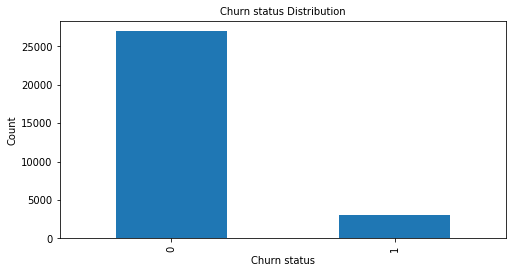

In [56]:
# Churn distribution.
plt.figure(figsize=(8,4))
telecomDataHigh['is_churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=10)

In [57]:
g1=telecomDataHigh.groupby(["night_pck_user_6"]).agg({"is_churn":"sum"}).sort_values(by="is_churn",ascending=False)
g2=telecomDataHigh.groupby(["night_pck_user_7"]).agg({"is_churn":"sum"}).sort_values(by="is_churn",ascending=False)
g3=telecomDataHigh.groupby(["night_pck_user_8"]).agg({"is_churn":"sum"}).sort_values(by="is_churn",ascending=False)
print(g1)
print(g2)
print(g3)

                  is_churn
night_pck_user_6          
0.0                   3009
1.0                     38
                  is_churn
night_pck_user_7          
0.0                   3018
1.0                     29
                  is_churn
night_pck_user_8          
0.0                   3030
1.0                     17


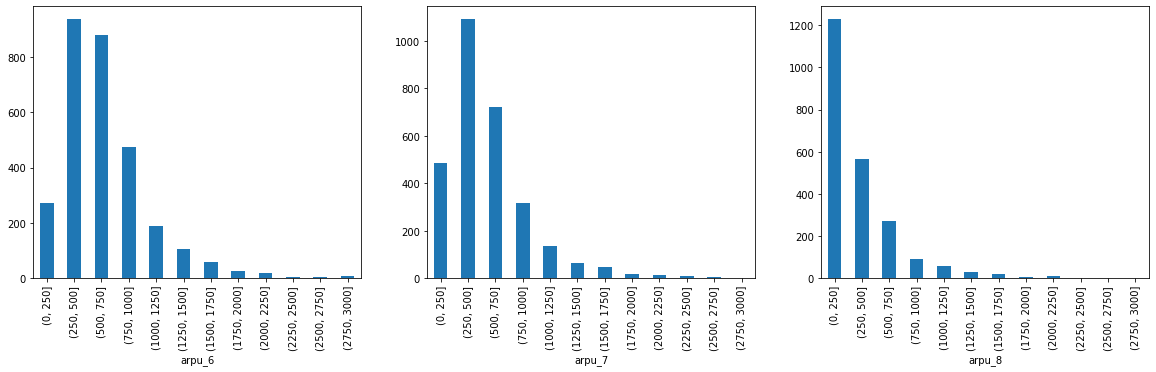

In [58]:
# For continuous variables
bins = [0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['arpu_6'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,2)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['arpu_7'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,3)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['arpu_8'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

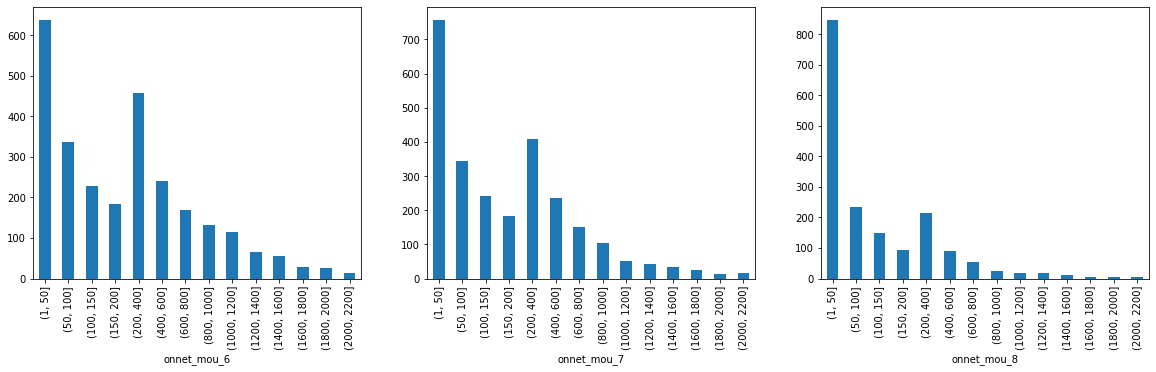

In [59]:
bins = [1,50,100,150,200,400,600,800,1000,1200,1400,1600,1800,2000,2200]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['onnet_mou_6'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,2)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['onnet_mou_7'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,3)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['onnet_mou_8'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

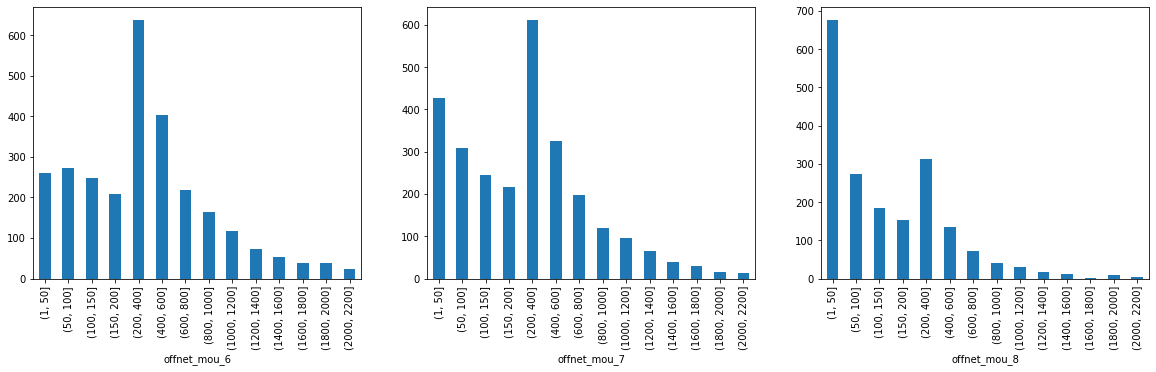

In [60]:
bins = [1,50,100,150,200,400,600,800,1000,1200,1400,1600,1800,2000,2200]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['offnet_mou_6'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,2)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['offnet_mou_7'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,3)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['offnet_mou_8'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

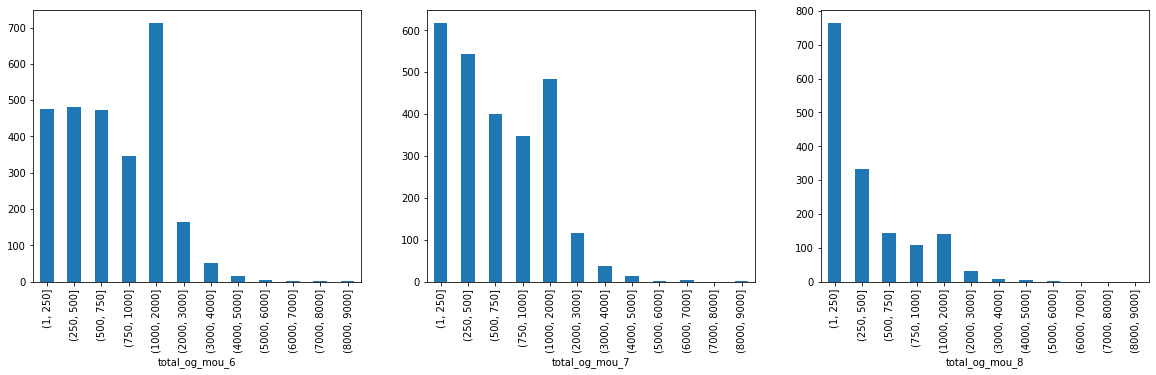

In [61]:
bins = [1,250,500,750,1000,2000,3000,4000,5000,6000,7000,8000,9000]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_og_mou_6'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,2)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_og_mou_7'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,3)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_og_mou_8'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

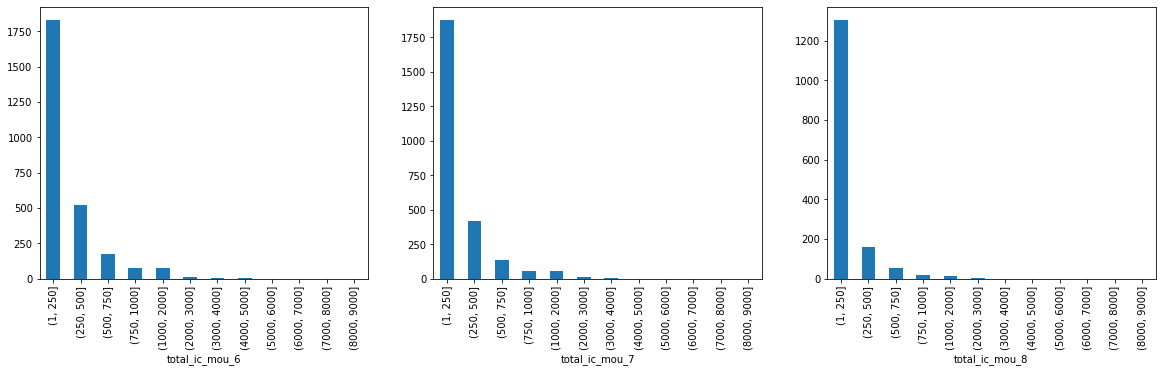

In [62]:
bins = [1,250,500,750,1000,2000,3000,4000,5000,6000,7000,8000,9000]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_ic_mou_6'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,2)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_ic_mou_7'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,3)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_ic_mou_8'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

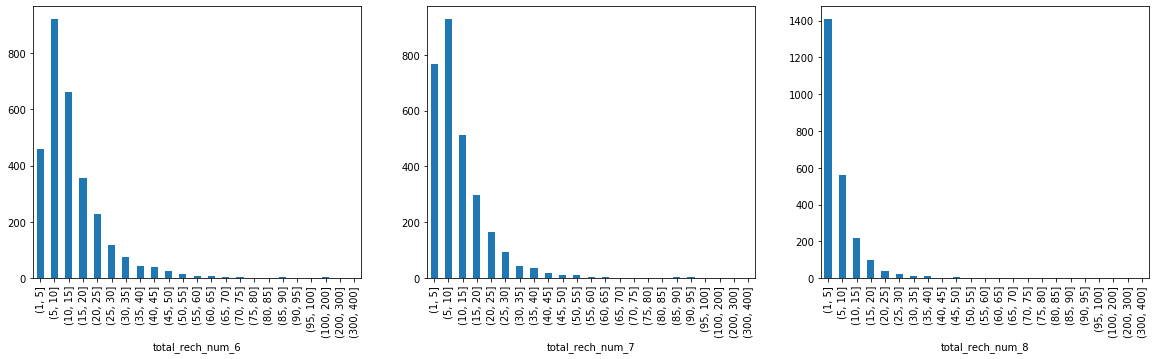

In [63]:
bins = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200,300,400]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_rech_num_6'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,2)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_rech_num_7'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,3)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_rech_num_8'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

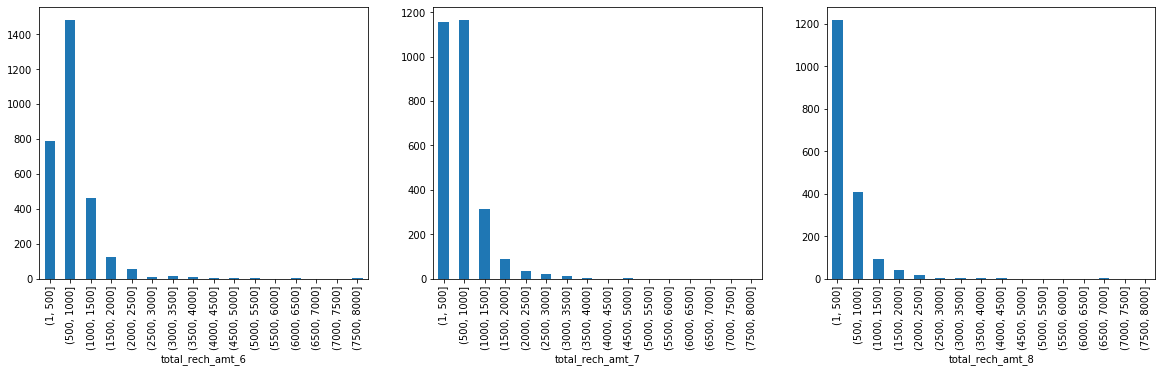

In [64]:
bins = [1,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_rech_amt_6'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,2)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_rech_amt_7'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,3)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_rech_amt_8'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

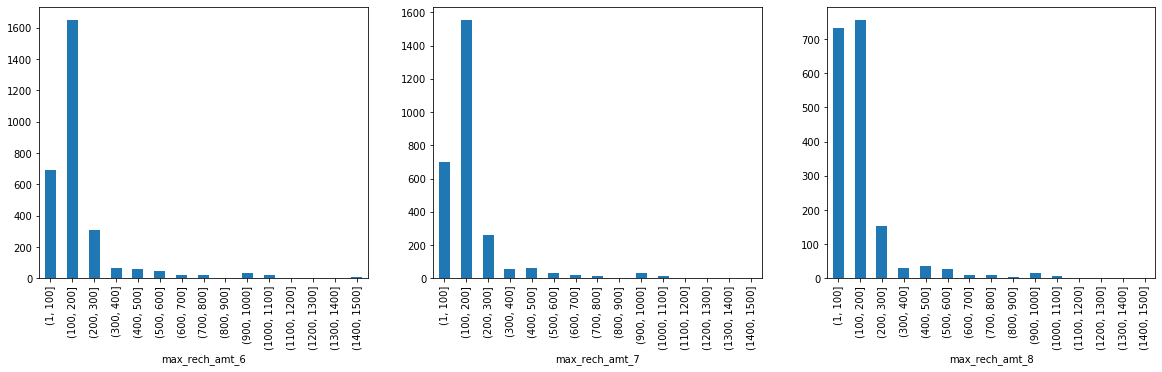

In [65]:
bins = [1,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['max_rech_amt_6'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,2)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['max_rech_amt_7'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,3)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['max_rech_amt_8'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

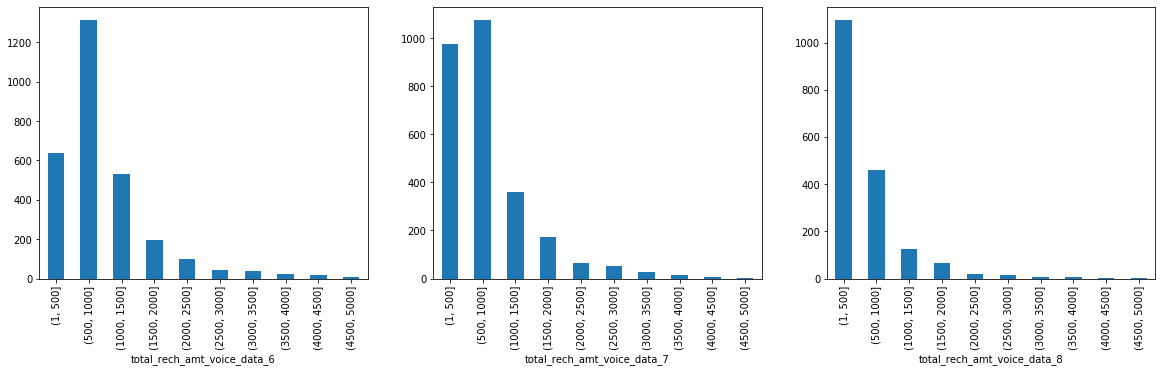

In [66]:
bins = [1,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_rech_amt_voice_data_6'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,2)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_rech_amt_voice_data_7'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,3)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['total_rech_amt_voice_data_8'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

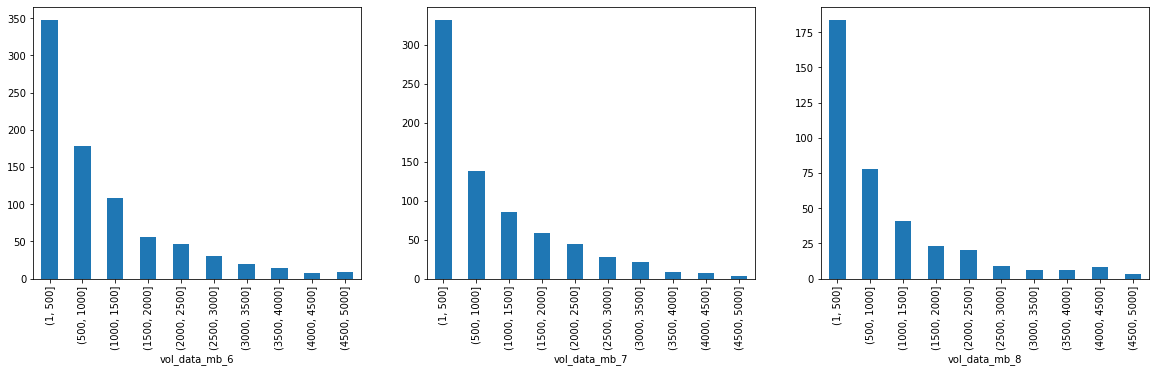

In [67]:
bins = [1,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['vol_data_mb_6'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,2)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['vol_data_mb_7'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,3)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['vol_data_mb_8'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

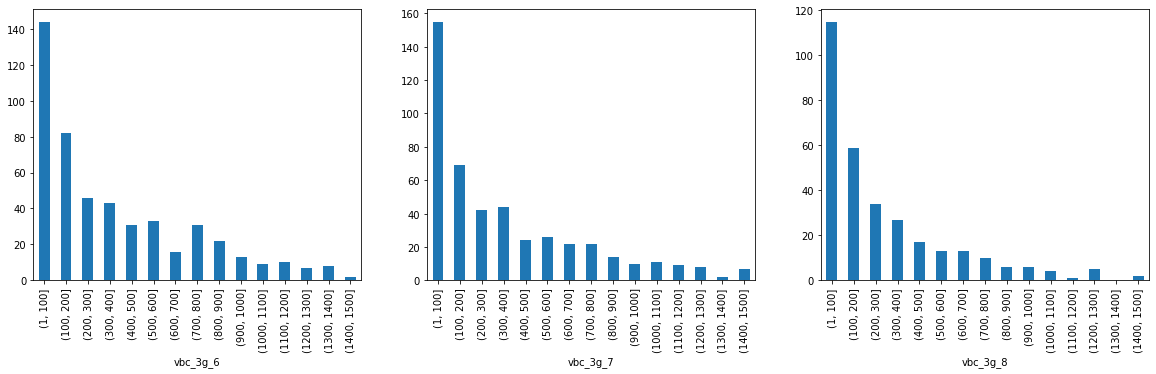

In [68]:
bins = [1,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['vbc_3g_6'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,2)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['vbc_3g_7'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

plt.subplot(1,3,3)
df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['vbc_3g_8'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

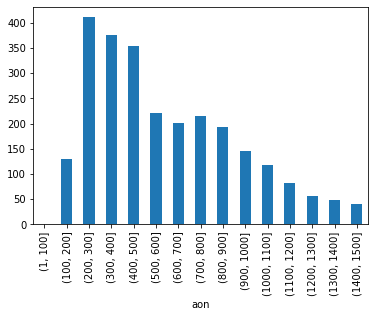

In [69]:
bins = [1,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]

df = telecomDataHigh.groupby(pd.cut(telecomDataHigh['aon'], bins=bins)).is_churn.sum()
df.plot(kind='bar')

In [70]:
# Looking at the outliers by scatter plots.
# plt.figure(figsize=(8,6))
# sns.pairplot(telecomDataHigh,x_vars=["onnet_mou_6"],y_vars="is_churn",height=4,aspect=1,kind="scatter")


In [71]:
# Checking correlation using heat map
corr = round(telecomDataHigh.corr(),2)
corr

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_recharge_amount,is_churn,loc_og_t2t_t2m_t2f_mou_6,loc_og_t2t_t2m_t2f_mou_7,loc_og_t2t_t2m_t2f_mou_8,count_rech_data_6,count_rech_data_7,count_rech_data_8,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,arpu_data_6,arpu_data_7,arpu_data_8,monthly_data_6,monthly_data_7,monthly_data_8,sachet_data_6,sachet_data_7,sachet_data_8,is_last_day_rch_6,is_last_day_rch_7,is_last_day_rch_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_voice_data_6,total_rech_amt_voice_data_7,total_rech_amt_voice_data_8
arpu_6,1.00,0.63,0.57,0.29,0.14,0.12,0.46,0.26,0.21,0.11,0.07,0.08,0.18,0.12,0.11,0.05,0.01,0.00,0.34,0.15,0.11,0.48,0.43,0.43,0.11,0.05,0.02,0.09,0.02,0.01,0.50,0.27,0.21,0.15,0.10,0.08,0.10,0.06,0.05,0.19,0.12,0.10,0.01,-0.03,-0.01,0.11,0.06,0.06,0.01,0.02,0.01,0.33,0.10,0.09,0.94,0.61,0.57,0.31,0.23,0.26,0.24,0.17,0.17,0.18,0.09,0.12,0.04,0.01,0.02,0.11,0.04,0.06,-0.01,0.12,0.12,0.17,0.87,0.06,0.27,0.17,0.16,0.08,0.02,0.02,0.21,0.13,0.14,0.29,0.16,0.17,0.20,0.10,0.12,0.02,-0.01,-0.01,0.09,-0.03,0.01,0.17,0.08,0.07,0.49,0.29,0.27
arpu_7,0.63,1.00,0.74,0.14,0.27,0.22,0.27,0.44,0.34,0.07,0.08,0.08,0.11,0.16,0.14,0.01,0.04,0.03,0.18,0.33,0.26,0.43,0.52,0.46,0.06,0.10,0.05,0.02,0.03,0.02,0.28,0.48,0.37,0.07,0.13,0.11,0.06,0.10,0.10,0.09,0.17,0.15,-0.02,-0.00,-0.01,0.06,0.10,0.07,0.00,0.03,0.01,0.12,0.29,0.21,0.64,0.94,0.74,0.24,0.34,0.36,0.22,0.26,0.23,0.10,0.18,0.14,0.02,0.02,0.03,0.05,0.11,0.09,-0.02,0.15,0.17,0.11,0.89,-0.03,0.14,0.24,0.20,0.03,0.09,0.05,0.13,0.23,0.18,0.16,0.29,0.21,0.11,0.22,0.15,-0.01,0.03,0.01,0.03,0.11,0.09,0.07,0.19,0.10,0.29,0.50,0.35
arpu_8,0.57,0.74,1.00,0.09,0.19,0.32,0.21,0.32,0.49,0.07,0.06,0.10,0.11,0.12,0.19,0.00,0.02,0.06,0.08,0.21,0.37,0.40,0.44,0.46,0.09,0.11,0.09,0.01,0.01,0.01,0.19,0.34,0.53,0.08,0.12,0.18,0.05,0.08,0.12,0.10,0.16,0.23,-0.01,-0.01,0.02,0.07,0.08,0.09,0.01,0.03,0.03,0.07,0.18,0.35,0.57,0.74,0.95,0.24,0.31,0.43,0.19,0.28,0.30,0.11,0.13,0.22,0.01,0.02,0.04,0.06,0.08,0.16,0.03,0.19,0.14,0.12,0.74,-0.19,0.15,0.21,0.30,0.02,0.05,0.12,0.12,0.15,0.24,0.15,0.18,0.30,0.11,0.14,0.25,-0.01,0.01,0.05,0.00,0.11,0.22,0.07,0.10,0.18,0.26,0.36,0.50
onnet_mou_6,0.29,0.14,0.09,1.00,0.72,0.59,0.01,-0.05,-0.04,0.01,0.01,0.03,0.05,0.06,0.06,0.05,0.03,0.04,0.60,0.40,0.32,-0.02,-0.02,-0.02,0.09,0.06,0.06,0.09,-0.00,-0.00,0.69,0.46,0.36,-0.02,-0.03,-0.05,0.06,0.03,0.02,0.00,-0.03,-0.04,0.02,-0.03,-0.02,-0.03,-0.03,-0.03,-0.01,-0.01,-0.01,0.25,0.11,0.09,0.28,0.13,0.09,-0.04,-0.06,-0.04,-0.02,-0.04,-0.03,-0.13,-0.14,-0.12,0.01,0.00,0.03,-0.14,-0.15,-0.13,-0.09,-0.09,-0.09,-0.08,0.23,0.07,0.25,0.17,0.14,-0.08,-0.07,-0.07,-0.10,-0.10,-0.09,-0.09,-0.09,-0.08,-0.11,-0.12,-0.11,-0.04,-0.04,-0.04,0.06,-0.01,-0.02,-0.06,-0.06,-0.05,0.05,-0.00,-0.01
onnet_mou_7,0.14,0.27,0.19,0.72,1.00,0.79,-0.03,0.00,0.01,0.02,-0.01,0.02,0.06,0.05,0.07,0.03,0.06,0.06,0.42,0.60,0.48,-0.02,-0.02,-0.02,0.05,0.11,0.10,0.04,-0.00,0.00,0.47,0.70,0.53,-0.07,-0.03,-0.03,0.02,0.05,0.04,-0.06,-0.01,-0.02

In [72]:
#plt.figure(figsize=(30,30))
#sns.heatmap(corr,annot=True, center=0.5)

Highly correlated features.

total_rech_amt_6 is highly correlated with arpu_6
total_rech_amt_7 is highly correlated with arpu_7
total_rech_amt_8 is highly correlated with arpu_8
isd_og_mou_6 is highly correlated with isd_og_mou_7 AND isd_og_mou_8
isd_og_mou_6 is highly correlated with  total_ic_mou_6
count_rech_data_6 is highly correlated with  sachet_data_6
count_rech_data_7 is highly correlated with  sachet_data_7
count_rech_data_8 is highly correlated with  sachet_data_8
total_rech_amt_data_6 is highly correlated with total_rech_amt_voice_data_6
total_rech_amt_data_7 is highly correlated with total_rech_amt_voice_data_7
total_rech_amt_data_8 is highly correlated with total_rech_amt_voice_data_8

In [73]:
# Dropping features with correlation above 0.9
telecomDataHigh.drop(["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8","isd_og_mou_6","isd_og_mou_7","isd_og_mou_8","count_rech_data_6","count_rech_data_7","count_rech_data_8","total_rech_amt_data_6","total_rech_amt_data_7","total_rech_amt_data_8"],axis=1,inplace=True)


In [74]:
telecomDataHigh.shape

(30011, 93)

In [75]:
telecomDataHigh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 93 columns):
arpu_6                         30011 non-null float64
arpu_7                         30011 non-null float64
arpu_8                         30011 non-null float64
onnet_mou_6                    30011 non-null float64
onnet_mou_7                    30011 non-null float64
onnet_mou_8                    30011 non-null float64
offnet_mou_6                   30011 non-null float64
offnet_mou_7                   30011 non-null float64
offnet_mou_8                   30011 non-null float64
roam_ic_mou_6                  30011 non-null float64
roam_ic_mou_7                  30011 non-null float64
roam_ic_mou_8                  30011 non-null float64
roam_og_mou_6                  30011 non-null float64
roam_og_mou_7                  30011 non-null float64
roam_og_mou_8                  30011 non-null float64
loc_og_t2c_mou_6               30011 non-null float64
loc_og_t2c_mou_7           

In [76]:
telecomDataHigh.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_

# 6. Feature Standardisation

In [77]:
# Normalising continuous features
df = telecomDataHigh[['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7','onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7','std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8','og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6','total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7','loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6','spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7','isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8','total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8','max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8','last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8','aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6','total_recharge_amount','loc_og_t2t_t2m_t2f_mou_6','loc_og_t2t_t2m_t2f_mou_7','loc_og_t2t_t2m_t2f_mou_8', 'vol_data_mb_6','vol_data_mb_7', 'vol_data_mb_8', 'arpu_data_6', 'arpu_data_7','arpu_data_8', 'monthly_data_6','monthly_data_7','monthly_data_8','sachet_data_6','sachet_data_7','sachet_data_8','total_rech_amt_voice_data_6','total_rech_amt_voice_data_7', 'total_rech_amt_voice_data_8']]

In [78]:
normalized_df=(df-df.mean())/df.std()
telecomDataHigh = telecomDataHigh.drop(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7','onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7','std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8','og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6','total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7','loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6','spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7','isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8','total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8','max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8','last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8','aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6','total_recharge_amount','loc_og_t2t_t2m_t2f_mou_6','loc_og_t2t_t2m_t2f_mou_7','loc_og_t2t_t2m_t2f_mou_8', 'vol_data_mb_6','vol_data_mb_7', 'vol_data_mb_8', 'arpu_data_6', 'arpu_data_7','arpu_data_8', 'monthly_data_6','monthly_data_7','monthly_data_8','sachet_data_6','sachet_data_7','sachet_data_8','total_rech_amt_voice_data_6','total_rech_amt_voice_data_7', 'total_rech_amt_voice_data_8'], 1)
telecomDataHigh = pd.concat([telecomDataHigh,normalized_df],axis=1)
telecomDataHigh.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,is_churn,is_last_day_rch_6,is_last_day_rch_7,is_last_day_rch_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_recharge_amount,loc_og_t2t_t2m_t2f_mou_6,loc_og_t2t_t2m_t2f_mou_7,loc_og_t2t_t2m_t2f_mou_8,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,arpu_data_6,arpu_data_7,arpu_data_8,monthly_data_6,monthly_data_7,monthly_data_8,sachet_data_6,sachet_data_7,sachet_data_8,total_rech_amt_voice_data_6,total_rech_amt_voice_data_7,total_rech_amt_voice_data_8
0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,1.088482,1.643375,5.356163,-0.516942,-0.518209,-0.461484,0.075430,0.294405,-0.102854,-0.014943,0.261689,0.246589,-0.047075,-0.096461,0.156156,-0.227477,-0.201199,-0.231528,-0.550703,-0.533673,-0.447436,-0.076061,-0.321927,-0.016825,-0.303555,-0.017361,-0.017809,-0.301606,-0.145802,-0.398865,0.587942,0.341035,-0.150603,0.921091,0.802471,1.034078,0.883122,0.657816,0.369963,0.737462,-0.099294,-0.237273,-0.135248,0.028182,0.265442,1.040337,0.890087,1.078539,-0.746192,-0.719738,-0.340275,8.062736,3.383941,8.210214,-0.731860,-0.745932,4.704289,-0.53784,-0.542633,-0.527335,-0.473785,-0.183620,-0.283677,-0.263315,0.999087,0.370574,0.669437,-0.010180,-0.365696,-0.391353,-0.372946,-0.325931,-0.327909,-0.328230,-0.444132,-0.442085,-0.428287,-0.30589,-0.317490,-0.321605,0.390485,-0.157764,1.596604
1,0.0,0.0,0.0,0.0,1.0,1.0,0,1.0,0.0,1.0,-0.471093,-0.209360,-0.807492,0.255342,0.096905,-0.498371,-0.686955,-0.705604,-0.499575,-0.219990,-0.177214,-0.177812,-0.247293,-0.225029,-0.202074,-0.227477,-0.201199,0.735007,-0.436277,-0.426464,-0.414266,-0.317719,-0.321927,0.146103,-0.303555,-0.017361,-0.017809,-0.270062,-0.405016,-0.659221,-0.519615,-0.709467,-0.711597,-0.204215,-0.326505,-0.336402,-0.563884,-0.774738,-0.773947,-0.343492,-0.099294,-0.237273,-0.165876,-0.160538,-0.156160,-0.084993,-0.095862,-0.096025,0.720767,0.945969,0.398233,-0.466013,-0.119315,-0.769785,-0.381640,-0.745932,-0.589654,-0.53784,0.881473,-0.307843,-0.973137,-0.277633,1.900678,0.002051,-0.363484,0.254568,0.015787,-0.555593,-0.365696,0.824618,-0.359781,-0.325931,-0.327909,-0.263120,-0.444132,0.954779,-0.428287,-0.30589,0.113065,0.968210,-0.364910,-0.051985,-0.353397
2,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,1.0,0.0,-0.213313,-0.828400,0.118642,0.446477,-0.406727,0.571500,-0.009825,-0.626163,0.225007,0.077284,1.713126,0.789431,-0.179991,0.135042,-0.188520,-0.227477,-0.201199,-0.165289,0.506034,-0.433602,0.489470,-0.317719,-0.321927,-0.091956,-0.303555,-0.017361,-0.017809,0.333748,-0.754250,0.570692,-0.090754,-0.702240,0.068324,2.652499,0.098687,3.023718,1.830487,-0.384942,2.356375,1.972837,-0.099294,-0.237273,3.480956,0.646166,5.094038,5.883404,0.958240,1.567295,-0.641409,-0.823844,0.081730,-0.351534,-0.361678,-0.190430,0.038625,-0.391695,-0.658495,-0.53784,-0.542633,-0.307843,1.376998,-0.331490,-0.331174,-0.311400,-0.647864,-0.200244,-0.608524,0.256414,-0.365696,-0.391353,-0.372924,-0.325931,-0.327909,-0.327574,-0.444132,-0.442085,-0.428287,-0.30589,-0.317490,0.968210,-0.318647,-0.502028,-0.001796
3,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,-0.353064,-0.624903,-0.704838,-0.532850,-0.478087,-0.422218,-0.258492,-0.399125,-0.

# 7. Model Building
### 1) Splitting Data into Training and Test Sets

In [79]:
from sklearn.model_selection import train_test_split
X=telecomDataHigh.drop(["is_churn"],axis=1)
y=telecomDataHigh["is_churn"]
y.head()

0    1
1    0
2    0
3    0
4    0
Name: is_churn, dtype: int32

In [80]:
X.shape

(30011, 92)

In [81]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### 2) Applying PCA to reduce dimensionality on the data without losing any important information.

In [82]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [83]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [84]:
pca.components_

array([[ 2.48853707e-03,  2.34368910e-03,  2.06024282e-03, ...,
         1.36903545e-01,  1.58067290e-01,  1.45552397e-01],
       [ 7.46077610e-04,  1.06658510e-03,  2.33264723e-03, ...,
         6.97661680e-02,  8.80885187e-02,  9.65930630e-02],
       [-3.81245237e-03, -4.42765121e-03, -4.83589949e-03, ...,
        -8.47285680e-02, -1.05001574e-01, -9.65657063e-02],
       ...,
       [-2.82895800e-06,  3.03631321e-06, -3.23131725e-07, ...,
        -1.84542977e-07,  2.36482122e-07, -2.91449700e-07],
       [-7.90292579e-07, -1.53381124e-06,  7.86072956e-07, ...,
        -7.22449204e-08,  1.35914482e-07,  1.38795617e-07],
       [ 2.18513820e-06, -1.11742548e-06,  7.25952817e-07, ...,
         4.84682414e-08, -2.45895786e-08,  2.48416813e-07]])

In [85]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(50)

,PC1,PC2,Feature
0,0.002489,0.000746,night_pck_user_6
1,0.002344,0.001067,night_pck_user_7
2,0.002060,0.002333,night_pck_user_8
3,0.084158,-0.014858,fb_user_6
4,0.086237,-0.012949,fb_user_7
5,0.084317,-0.004571,fb_user_8
6,-0.004722,0.007536,is_last_day_rch_6
7,-0.004209,0.014863,is_last_day_rch_7
8,0.007075,0.021868,is_last_day_rch_8
9,0.073639,0.184752,arpu_6


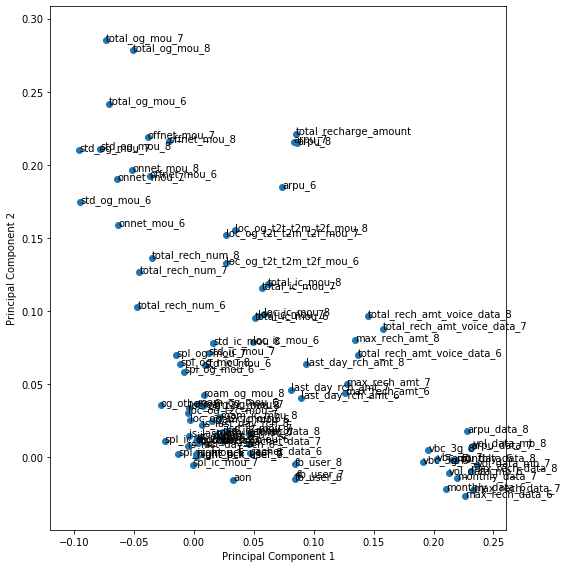

In [86]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

Looking at the screeplot to assess the number of needed principal compo

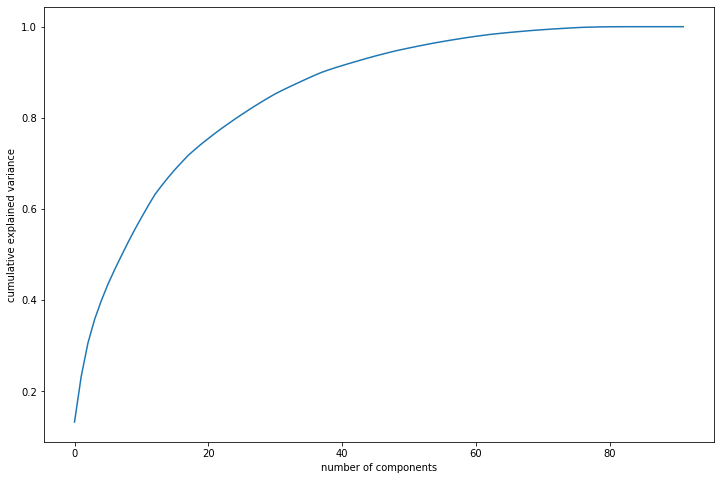

In [87]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 60 components are enough to describe 95% of the variance in the dataset
- Choosing 60 components for our modeling

In [88]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

#### Basis transformation - getting the data onto our PCs

In [89]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21007, 50)

#### Creating correlation matrix for the principal components - there should be little to no correlation

In [90]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

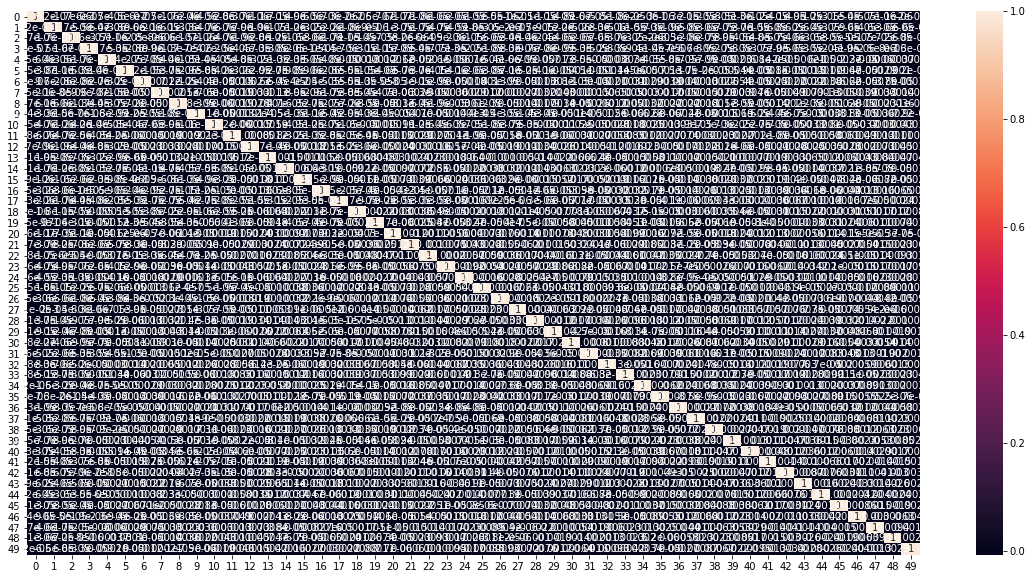

In [91]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [92]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.009424938266859079 , min corr:  -0.006608435230287832


In [93]:
#Applying selected components to the test data - 50 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9004, 50)

### 3) Applying a logistic regression on our Principal Components

In [94]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [95]:
y_train_pred = model_pca.predict_proba(df_train_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))

'0.89'

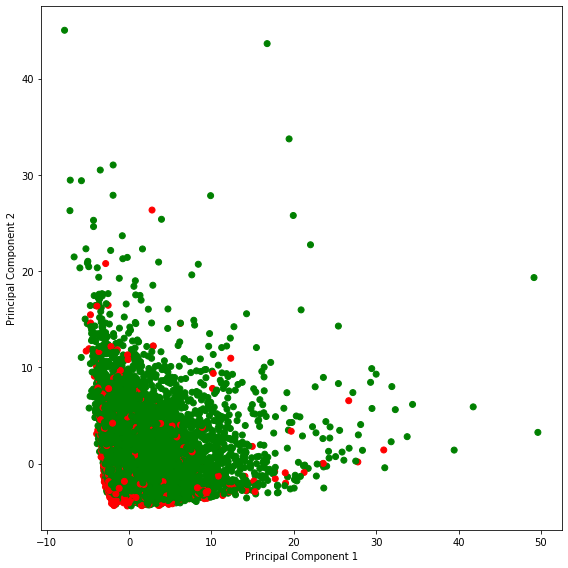

In [96]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [97]:
#plotting roc curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

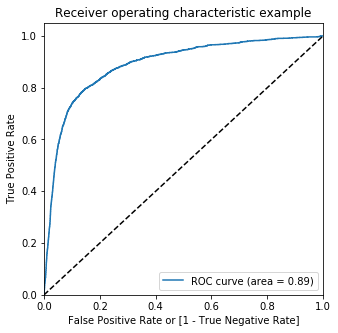

In [98]:
draw_roc(y_train, y_train_pred)

In [99]:
df_train = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
df_train['UniqueID'] = y_train.index
df_train.head()

,Churn,Churn_Prob,UniqueID
0,0,0.408912,1434
1,0,0.096505,4636
2,0,0.185082,17998
3,0,0.183096,18683
4,0,0.202269,26470


In [100]:
df_train['predicted'] = df_train.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
df_train.head()

,Churn,Churn_Prob,UniqueID,predicted
0,0,0.408912,1434,0
1,0,0.096505,4636,0
2,0,0.185082,17998,0
3,0,0.183096,18683,0
4,0,0.202269,26470,0


In [101]:
from sklearn.metrics import confusion_matrix
confusion = metrics.confusion_matrix(df_train["Churn"], df_train["predicted"])
print(confusion)

[[15415  3452]
 [  388  1752]]


In [102]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(df_train["Churn"], df_train["predicted"]))

0.8172037892131194


In [103]:
# We have to check sensitivity since this is required in our case study, sensitivity = tp/(tp+fn)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

TP / float(TP+FN)

0.8186915887850468

### 4) Finding Optimal Cutoff Point

In [104]:
# creatinge columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    df_train[i]= df_train["Churn_Prob"].map(lambda x: 1 if x > i else 0)
df_train.head(10)

,Churn,Churn_Prob,UniqueID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.408912,1434,0,1,1,1,1,1,0,0,0,0,0
1,0,0.096505,4636,0,1,0,0,0,0,0,0,0,0,0
2,0,0.185082,17998,0,1,1,0,0,0,0,0,0,0,0
3,0,0.183096,18683,0,1,1,0,0,0,0,0,0,0,0
4,0,0.202269,26470,0,1,1,1,0,0,0,0,0,0,0
5,0,0.081118,21505,0,1,0,0,0,0,0,0,0,0,0
6,0,0.704191,3762,1,1,1,1,1,1,1,1,1,0,0
7,0,0.220161,18121,0,1,1,1,0,0,0,0,0,0,0
8,0,0.424926,17011,0,1,1,1,1,1,0,0,0,0,0
9,0,0.027229,5067,0,1,0,0,0,0,0,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(df_train.Churn, df_train[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.101871  1.000000  0.000000
0.1   0.1  0.384062  0.971963  0.317380
0.2   0.2  0.540439  0.946262  0.494408
0.3   0.3  0.654020  0.920093  0.623841
0.4   0.4  0.745847  0.878972  0.730747
0.5   0.5  0.817204  0.818692  0.817035
0.6   0.6  0.867282  0.763551  0.879048
0.7   0.7  0.899462  0.680841  0.924259
0.8   0.8  0.912839  0.541589  0.954948
0.9   0.9  0.906698  0.233645  0.983039


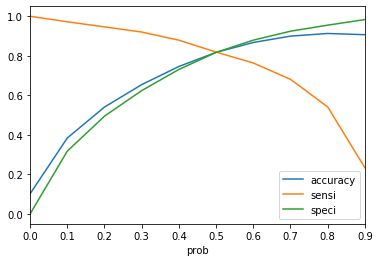

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

### 6) Making predictions on the test set

In [107]:
#Making prediction on the test data
y_test_pred = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred))

'0.89'

In [108]:
y_test_pred

array([0.82051503, 0.87380769, 0.10878045, ..., 0.08255777, 0.45140344,
       0.59690829])

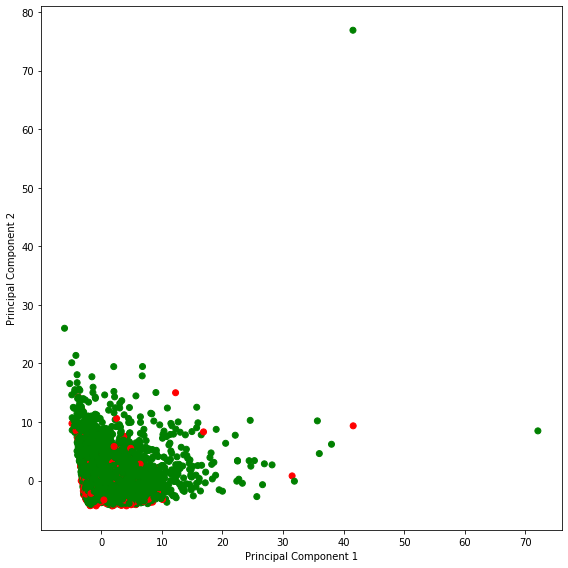

In [109]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_test_pca[:,0], df_test_pca[:,1], c = y_test.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [110]:
df_test = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
df_test['UniqueID'] = y_test.index
df_test.head()

,Churn,Churn_Prob,UniqueID
0,1,0.820515,8869
1,0,0.873808,14992
2,0,0.108780,27111
3,0,0.136879,26075
4,0,0.077137,27484


In [111]:
df_test['predicted'] = df_test.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
df_test.head()

,Churn,Churn_Prob,UniqueID,predicted
0,1,0.820515,8869,1
1,0,0.873808,14992,1
2,0,0.108780,27111,0
3,0,0.136879,26075,0
4,0,0.077137,27484,0


In [112]:
from sklearn.metrics import confusion_matrix
confusion = metrics.confusion_matrix(df_test['Churn'], df_test['predicted'])
print(confusion)

[[6622 1475]
 [ 150  757]]


In [113]:
print(metrics.accuracy_score(df_test["Churn"], df_test["predicted"]))

0.8195246557085739


In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

specificity=TP / float(TP+FN)
specificity

0.834619625137817

### We are getting approx 81% specificity on training data and 83% on test data which is comparable and good but we can try decision tree to improve the accuracy of the model.

In [115]:
# Applying Decision tree algorithm.

from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(class_weight="balanced")
dt_default.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [116]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_test_pred = dt_default.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8097
           1       0.34      0.33      0.34       907

    accuracy                           0.87      9004
   macro avg       0.63      0.63      0.63      9004
weighted avg       0.87      0.87      0.87      9004



In [117]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))

[[7500  597]
 [ 604  303]]
0.8666148378498445


In [118]:
# Hyperparameter tuning - max_depth

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight="balanced",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sco

In [119]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.130013,0.001633,0.003000,0.000000e+00,1,{'max_depth': 1},0.742967,0.747929,0.743787,0.744895,0.002172,38,0.743573,0.743163,0.749589,0.745442,0.002937
1,0.237691,0.010782,0.003334,4.713142e-04,2,{'max_depth': 2},0.836070,0.665239,0.837332,0.779550,0.080829,36,0.836118,0.663763,0.843984,0.781288,0.083165
2,0.329700,0.008731,0.003334,4.713704e-04,3,{'max_depth': 3},0.727117,0.687232,0.731648,0.715333,0.019955,39,0.723222,0.688111,0.744306,0.718546,0.023178
3,0.419709,0.004785,0.003000,1.123916e-07,4,{'max_depth': 4},0.722119,0.790203,0.790774,0.767696,0.032231,37,0.723865,0.793645,0.808783,0.775431,0.036983
4,0.524052,0.009901,0.003334,4.714827e-04,5,{'max_depth': 5},0.832786,0.780491,0.785775,0.799686,0.023506,35,0.839617,0.783863,0.812781,0.812087,0.022767


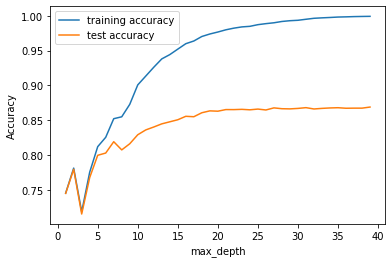

In [120]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [121]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight="balanced",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [122]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.014101,0.043738,0.003667,4.713704e-04,5,{'min_samples_leaf': 5},0.824789,0.839474,0.838332,0.834198,0.006670,1,0.936447,0.935023,0.934238,0.935236,0.000914
1,0.892756,0.016215,0.004334,4.715390e-04,25,{'min_samples_leaf': 25},0.775096,0.771208,0.772208,0.772838,0.001649,4,0.821765,0.823991,0.830203,0.825320,0.003571
2,0.831083,0.034712,0.003667,4.715951e-04,45,{'min_samples_leaf': 45},0.759246,0.776921,0.768352,0.768173,0.007217,5,0.789274,0.804284,0.808283,0.800614,0.008183
3,0.770744,0.033483,0.003334,4.713704e-04,65,{'min_samples_leaf': 65},0.783093,0.780063,0.764353,0.775837,0.008214,3,0.803413,0.804927,0.800143,0.802828,0.001996
4,0.757409,0.040717,0.003000,1.123916e-07,85,{'min_samples_leaf': 85},0.781094,0.754499,0.748929,0.761508,0.014036,9,0.797415,0.774438,0.784648,0.785500,0.009400


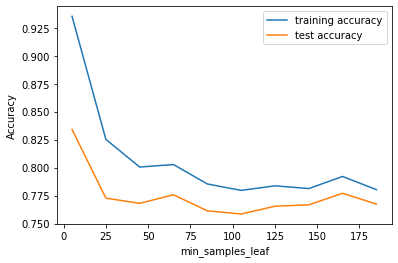

In [123]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [124]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight="balanced",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [125]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.088776,0.028967,0.004000,0.000000e+00,5,{'min_samples_split': 5},0.861345,0.863325,0.867181,0.863950,0.002423,1,0.991717,0.992788,0.994431,0.992979,0.001116
1,1.070774,0.033072,0.003667,4.714266e-04,25,{'min_samples_split': 25},0.816507,0.827621,0.822765,0.822297,0.004549,2,0.924593,0.929240,0.925955,0.926596,0.001950
2,1.011435,0.028055,0.004334,4.713142e-04,45,{'min_samples_split': 45},0.789804,0.799629,0.796630,0.795354,0.004111,3,0.871822,0.886398,0.879971,0.879397,0.005964
3,0.992099,0.030014,0.004000,2.247832e-07,65,{'min_samples_split': 65},0.767814,0.780777,0.778349,0.775646,0.005627,4,0.838618,0.854195,0.852553,0.848455,0.006988
4,0.975764,0.027864,0.004000,1.123916e-07,85,{'min_samples_split': 85},0.752249,0.776350,0.769780,0.766126,0.010173,7,0.812268,0.837344,0.836416,0.828676,0.011608


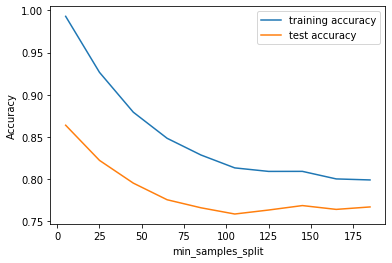

In [126]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [127]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10,20,5),
    'min_samples_leaf': range(10,20,5),
    'min_samples_split': range(20,50,10),
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight="balanced")
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 20, 5),
               

In [128]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.383472,0.009674,0.003334,4.715951e-04,entropy,10,10,20,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.822505,0.803913,0.795915,0.807445,0.011139,7,0.876035,0.853267,0.870760,0.866688,0.009731
1,1.359469,0.028967,0.003667,9.429093e-04,entropy,10,10,30,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.817221,0.800057,0.795344,0.804208,0.009401,11,0.868538,0.846055,0.865762,0.860118,0.010009
2,1.296463,0.027381,0.003667,4.716513e-04,entropy,10,10,40,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.810510,0.795630,0.784490,0.796877,0.010659,18,0.860825,0.839557,0.850982,0.850455,0.008691
3,1.267793,0.031333,0.004000,1.123916e-07,entropy,10,15,20,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.813651,0.789489,0.786061,0.796401,0.012279,20,0.865753,0.836915,0.856765,0.853144,0.012048
4,1.270794,0.023331,0.003334,4.714266e-04,entropy,10,15,30,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.814365,0.788346,0.787346,0.796687,0.012508,19,0.865753,0.833845,0.856765,0.852121,0.013434
5,1.272794,0.022576,0.003334,4.713704e-04,entropy,10,15,40,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.812081,0.787204,0.776492,0.791927,0.014908,23,0.860397,0.832988,0.845341,0.846242,0.011208
6,1.392139,0.030597,0.003667,4.715390e-04,entropy,15,10,20,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.829644,0.820051,0.822908,0.824201,0.004022,1,0.905170,0.905105,0.911175,0.907150,0.002846
7,1.509484,0.203547,0.004000,8.164374e-04,entropy,15,10,30,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.818221,0.805770,0.809769,0.811253,0.005190,4,0.886461,0.880328,0.893181,0.886657,0.005249
8,1.663500,0.150572,0.003334,4.715951e-04,entropy,15,10,40,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.808511,0.800914,0.798058,0.802494,0.004411,12,0.872179,0.865120,0.872831,0.870043,0.003492
9,1.653832,0.164670,0.005334,1.885762e-03,entropy,15,15,20,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.812795,0.801057,0.793488,0.802447,0.007943,13,0.877249,0.871760,0.879829,0.876279,0.003365


In [129]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8242014566573047
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [130]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=10,
                                  min_samples_split=20,class_weight="balanced")
clf_gini.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [131]:
# accuracy score
clf_gini.score(df_test_pca,y_test)

0.820191026210573

### We are getting approx 82% accuracy both by logistic and decision tree algorithms.

# Part 2 : Top 10 features 

## Apply Lasso for feature selection

In [138]:
# Applying lasso to get the important features.
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer 
# list of alphas to tune
# alpha=[0.0001, 0.0005, 0.001, 
#                      0.005, 0.01, 0.05, 0.1, 0.5, 1, 
#                      10, 100, 1000, 1500, 2000, 2500, 
#                      2600, 2700, 2800, 2900, 3000, 3100, 3200  
#                      ]
alpha=[0.001,0.005,0.01,0.05, 0.1, 0.5, 1]

# param_grid = {'class_weight' : ['balanced'], 
#               'penalty' : ['l1'],  
#               'C' : alpha, 
#               'max_iter' : [100, 1000, 2000] }
param_grid = {'class_weight' : ['balanced'], 
              'penalty' : ['l1'],  
              'C' : alpha, 
              'max_iter' : [50,100] }

In [140]:
# Make an roc_auc scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

logit = LogisticRegression()

grid = GridSearchCV(estimator = logit, param_grid = param_grid , 
                    scoring = scorer, verbose = 1, cv=3,
                    n_jobs = -1)

X = X_train.values

grid.fit(X,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

best_parameters = grid.best_params_

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   56.8s finished


Best Score:0.82527603068558
Best Parameters: {'C': 0.05, 'class_weight': 'balanced', 'max_iter': 50, 'penalty': 'l1'}


In [141]:
# We get the best model 
best_clf = grid.best_estimator_
print(best_clf)

LogisticRegression(C=0.05, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=50, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [143]:
model = LogisticRegression(C=0.05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1,l1_ratio=None,max_iter=50,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False);

model.fit(X, y_train);

In [144]:
print(model.coef_)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.55206108e-01  0.00000000e+00 -2.89507383e-01
  -1.35261325e+00  9.92850648e-02  3.86819992e-03 -2.04679968e-02
   9.73970114e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   6.64263398e-02 -1.20322395e-01  1.19345621e-03  3.83549229e-02
   6.59265286e-03  2.54470233e-02  1.15361035e-01  7.08188488e-02
  -2.67750361e-03  5.25601740e-02  1.25665879e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.98577086e-02 -1.92916424e-02  0.00000000e+00  1.21712451e-03
   2.23815469e-03  2.20944926e-01 -5.10587119e-01  0.00000000e+00
   4.37624083e-01 -9.69650580e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.81841840e-01  0.00000000e+00 -5.94537663e-01
  -1.43463113e-02  0.00000000e+00 -3.62159309e-01  5.40499957e-02
   2.25886233e-02  0.00000000e+00 -2.26023968e-02 -7.83222596e-02
   0.00000000e+00  3.46497117e-02  2.71023141e-01 -3.73286049e-01
  -6.91944

In [153]:
X_train.columns

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'is_last_day_rch_6', 'is_last_day_rch_7',
       'is_last_day_rch_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6',

In [177]:
model.coef_.ravel()

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.55206108e-01,  0.00000000e+00, -2.89507383e-01,
       -1.35261325e+00,  9.92850648e-02,  3.86819992e-03, -2.04679968e-02,
        9.73970114e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.64263398e-02, -1.20322395e-01,  1.19345621e-03,  3.83549229e-02,
        6.59265286e-03,  2.54470233e-02,  1.15361035e-01,  7.08188488e-02,
       -2.67750361e-03,  5.25601740e-02,  1.25665879e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.98577086e-02, -1.92916424e-02,  0.00000000e+00,  1.21712451e-03,
        2.23815469e-03,  2.20944926e-01, -5.10587119e-01,  0.00000000e+00,
        4.37624083e-01, -9.69650580e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.81841840e-01,  0.00000000e+00, -5.94537663e-01,
       -1.43463113e-02,  0.00000000e+00, -3.62159309e-01,  5.40499957e-02,
        2.25886233e-02,  

In [178]:
coef = pd.Series(model.coef_.ravel(), index = X_train.columns)
coef

night_pck_user_6               0.000000
night_pck_user_7               0.000000
night_pck_user_8               0.000000
fb_user_6                      0.000000
fb_user_7                      0.000000
fb_user_8                     -0.155206
is_last_day_rch_6              0.000000
is_last_day_rch_7             -0.289507
is_last_day_rch_8             -1.352613
arpu_6                         0.099285
arpu_7                         0.003868
arpu_8                        -0.020468
onnet_mou_6                    0.097397
onnet_mou_7                    0.000000
onnet_mou_8                    0.000000
offnet_mou_6                   0.000000
offnet_mou_7                   0.066426
offnet_mou_8                  -0.120322
roam_ic_mou_6                  0.001193
roam_ic_mou_7                  0.038355
roam_ic_mou_8                  0.006593
roam_og_mou_6                  0.025447
roam_og_mou_7                  0.115361
roam_og_mou_8                  0.070819
loc_og_t2c_mou_6              -0.002678


In [179]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 61 variables and eliminated the other 31 variables


In [182]:
coef[coef!=0]

fb_user_8                     -0.155206
is_last_day_rch_7             -0.289507
is_last_day_rch_8             -1.352613
arpu_6                         0.099285
arpu_7                         0.003868
arpu_8                        -0.020468
onnet_mou_6                    0.097397
offnet_mou_7                   0.066426
offnet_mou_8                  -0.120322
roam_ic_mou_6                  0.001193
roam_ic_mou_7                  0.038355
roam_ic_mou_8                  0.006593
roam_og_mou_6                  0.025447
roam_og_mou_7                  0.115361
roam_og_mou_8                  0.070819
loc_og_t2c_mou_6              -0.002678
loc_og_t2c_mou_7               0.052560
loc_og_t2c_mou_8               0.012567
spl_og_mou_8                  -0.019858
og_others_6                   -0.019292
og_others_8                    0.001217
total_og_mou_6                 0.002238
total_og_mou_7                 0.220945
total_og_mou_8                -0.510587
loc_ic_mou_7                   0.437624


### From the above we can see Lasso picked up 61 feature out of 92, Now either we can use Feature Selection Using RFE but since Still we have 61 feature it would be very difficult to remove feature one by one So we will use Random forest feature slection criteria

# Random Forest

In [191]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight="balanced")

In [192]:
# fit
rfc.fit(df_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [193]:
# Making predictions
y_test_pred = dt_default.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8097
           1       0.34      0.33      0.34       907

    accuracy                           0.87      9004
   macro avg       0.63      0.63      0.63      9004
weighted avg       0.87      0.87      0.87      9004



In [194]:
# Printing confusion matrix
print(confusion_matrix(y_test, y_test_pred))

[[7500  597]
 [ 604  303]]


In [195]:
print(accuracy_score(y_test, y_test_pred))

0.8666148378498445


# Hyperparameter Tuning

In [196]:
# Hyperparameter tuning - max_depth
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [197]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.246686,0.027185,0.014168,7.728415e-03,2,{'max_depth': 2},0.722547,0.755641,0.722222,0.733470,0.015678,4,0.724222,0.755801,0.742092,0.740705,0.012930
1,0.617549,0.025579,0.011668,1.178538e-03,7,{'max_depth': 7},0.874625,0.866610,0.858755,0.866663,0.006479,3,0.898243,0.895037,0.896965,0.896749,0.001318
2,0.765061,0.005401,0.015001,1.123916e-07,12,{'max_depth': 12},0.904184,0.905313,0.898886,0.902794,0.002802,2,0.965224,0.966940,0.967083,0.966416,0.000845
3,0.860902,0.007169,0.015001,1.123916e-07,17,{'max_depth': 17},0.905612,0.909597,0.904599,0.906603,0.002158,1,0.981148,0.983863,0.981507,0.982173,0.001204


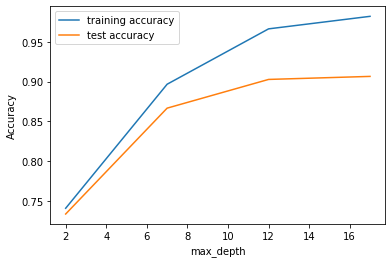

In [198]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 12 looks best max_depth

##### Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit

In [200]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=6,class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=6,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

In [201]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.616891,0.134701,0.099171,0.020139,100,{'n_estimators': 100},0.872198,0.871894,0.862039,0.868710,0.004719,4,0.887889,0.888040,0.891110,0.889013,0.001484
1,25.123505,0.180735,0.393349,0.004250,500,{'n_estimators': 500},0.872626,0.877749,0.865039,0.871805,0.005221,1,0.890388,0.893752,0.893538,0.892560,0.001538
2,45.285978,0.178196,0.712528,0.002041,900,{'n_estimators': 900},0.873768,0.875607,0.863468,0.870948,0.005342,3,0.891602,0.891325,0.893609,0.892179,0.001018
3,65.314279,0.162748,1.020874,0.002357,1300,{'n_estimators': 1300},0.875339,0.876321,0.862039,0.871233,0.006513,2,0.893245,0.892538,0.892681,0.892821,0.000305


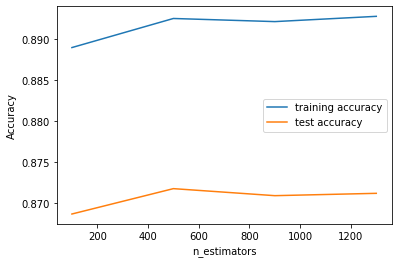

In [202]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node


In [203]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 18]}

# instantiate the model
rf = RandomForestClassifier(max_depth=6,class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=6,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

In [204]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.400016,0.005401,0.015001,0.000000,4,{'max_features': 4},0.851921,0.836190,0.840760,0.842957,0.006607,4,0.872037,0.860978,0.872474,0.868496,0.005319
1,0.641692,0.052614,0.011667,0.001179,8,{'max_features': 8},0.861488,0.858897,0.840046,0.853477,0.009556,3,0.882534,0.870118,0.873545,0.875399,0.005235
2,0.992540,0.026537,0.010834,0.001179,14,{'max_features': 14},0.859632,0.865324,0.860468,0.861808,0.002510,1,0.875607,0.879329,0.887112,0.880683,0.004793
3,1.236716,0.003118,0.010834,0.001179,18,{'max_features': 18},0.857061,0.858612,0.852185,0.855953,0.002738,2,0.873250,0.876044,0.880900,0.876731,0.003160


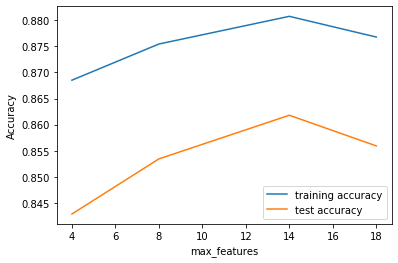

In [205]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:
•If int, then consider min_samples_leaf as the minimum number.
•If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.


In [206]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [207]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.614191,0.036763,0.013334,0.001179,100,{'min_samples_leaf': 100},0.829359,0.838618,0.812911,0.826962,0.010631,1,0.842259,0.851339,0.836273,0.843290,0.006194
1,0.550855,0.020447,0.011667,0.001178,150,{'min_samples_leaf': 150},0.826075,0.813482,0.816338,0.818632,0.005391,2,0.835190,0.820136,0.833345,0.829557,0.006704
2,0.515854,0.021442,0.011667,0.001178,200,{'min_samples_leaf': 200},0.810224,0.801057,0.803199,0.804827,0.003916,4,0.819909,0.809282,0.827347,0.818846,0.007413
3,0.496687,0.043029,0.011667,0.001179,250,{'min_samples_leaf': 250},0.805798,0.814910,0.795487,0.805398,0.007934,3,0.803913,0.819636,0.814566,0.812705,0.006552
4,0.443351,0.007728,0.011667,0.001179,300,{'min_samples_leaf': 300},0.790376,0.796201,0.780348,0.788975,0.006547,6,0.795130,0.806141,0.803499,0.801590,0.004693


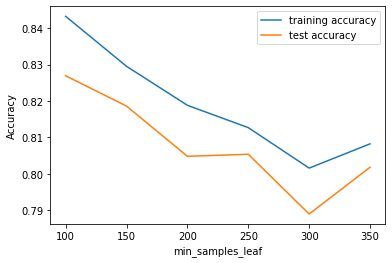

In [208]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### You can see that the model starts of overfit as you decrease the value of min_samples_leaf

# Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.


In [209]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [210]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.832533,0.010802,0.019168,3.118098e-03,200,{'min_samples_split': 200},0.842068,0.858612,0.846330,0.849003,0.007014,1,0.867823,0.869118,0.870189,0.869044,0.000967
1,0.765864,0.022017,0.012501,0.000000e+00,250,{'min_samples_split': 250},0.843210,0.842902,0.832048,0.839387,0.005191,2,0.862753,0.860978,0.860407,0.861380,0.000999
2,0.692528,0.023185,0.012501,0.000000e+00,300,{'min_samples_split': 300},0.839212,0.832048,0.819766,0.830342,0.008030,3,0.852756,0.845984,0.845769,0.848170,0.003244
3,0.665027,0.030071,0.013334,1.178538e-03,350,{'min_samples_split': 350},0.828788,0.835904,0.821765,0.828819,0.005772,4,0.841260,0.847626,0.842913,0.843933,0.002697
4,0.650860,0.010475,0.012500,1.123916e-07,400,{'min_samples_split': 400},0.827931,0.826621,0.809483,0.821345,0.008405,5,0.842045,0.836701,0.834916,0.837887,0.003029


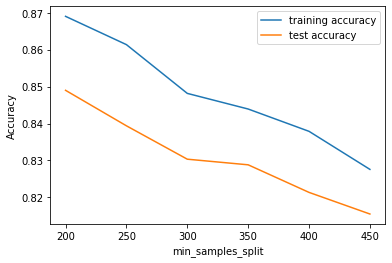

In [211]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.


In [212]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [7,10,12],
    'min_samples_leaf': range(100, 300, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 400], 
    'max_features': [5, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [213]:
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 10.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [214]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8545722854286666 using {'max_depth': 12, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 400}


### Fitting the final model with the best parameters obtained from grid search.

In [226]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.889402,0.072239,0.150840,2.771501e-02,7,5,100,200,100,"{'max_depth': 7, 'max_features': 5, 'min_sampl...",0.851492,0.857612,0.843902,0.851002,0.005608,9
1,11.615465,0.102311,0.250010,2.041386e-03,7,5,100,200,200,"{'max_depth': 7, 'max_features': 5, 'min_sampl...",0.851349,0.859754,0.843902,0.851668,0.006476,8
2,23.340934,0.702046,0.503354,1.328175e-02,7,5,100,200,400,"{'max_depth': 7, 'max_features': 5, 'min_sampl...",0.856204,0.862039,0.845330,0.854525,0.006924,2
3,5.737729,0.236899,0.163340,3.164604e-02,7,5,100,400,100,"{'max_depth': 7, 'max_features': 5, 'min_sampl...",0.841782,0.848186,0.832619,0.840863,0.006388,23
4,11.919643,0.238165,0.263344,2.383476e-02,7,5,100,400,200,"{'max_depth': 7, 'max_features': 5, 'min_sampl...",0.843924,0.847044,0.830620,0.840529,0.007122,24
5,22.890082,0.135057,0.476686,1.296415e-02,7,5,100,400,400,"{'max_depth': 7, 'max_features': 5, 'min_sampl...",0.845780,0.845616,0.834761,0.842053,0.005156,19
6,13.148026,0.071621,0.126672,4.249389e-03,7,12,100,200,100,"{'max_depth': 7, 'max_features': 12, 'min_samp...",0.847780,0.854613,0.836332,0.846242,0.007542,17
7,26.103544,0.397576,0.238343,8.498747e-03,7,12,100,200,200,"{'max_depth': 7, 'max_features': 12, 'min_samp...",0.851492,0.851328,0.840189,0.847670,0.005290,12
8,51.764571,0.663072,0.465019,6.124059e-03,7,12,100,200,400,"{'max_depth': 7, 'max_features': 12, 'min_samp...",0.850064,0.853756,0.841759,0.848527,0.005017,10
9,12.713009,0.040979,0.116671,2.356852e-03,7,12,100,400,100,"{'max_depth': 7, 'max_features': 12, 'min_samp...",0.831215,0.834904,0.822336,0.829485,0.005274,35


In [227]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 400}

In [228]:
best_estimator = grid_search.best_estimator_

In [229]:
best_estimator.fit(df_train_pca, y_train)

# Make predictions
prediction_test = best_estimator.predict(df_test_pca)

print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8097
           1       0.38      0.77      0.51       907

    accuracy                           0.85      9004
   macro avg       0.68      0.82      0.71      9004
weighted avg       0.91      0.85      0.87      9004

[[6975 1122]
 [ 209  698]]


In [254]:
sorted(best_estimator.feature_importances_)

[0.003645909613567106,
 0.004051984128465324,
 0.004158234681358867,
 0.004201265042649262,
 0.004451082639124934,
 0.004651928646187017,
 0.004906280069152803,
 0.0049126842511980195,
 0.005062253274340292,
 0.005316391962185992,
 0.005700631507067858,
 0.006035098816482288,
 0.006287255612917075,
 0.006510463250089129,
 0.0073583632933874755,
 0.007566853379988842,
 0.007578142211059955,
 0.0075811412669384666,
 0.007623574864891725,
 0.007873159529025536,
 0.008106190903943723,
 0.008304774815769151,
 0.008315127218712685,
 0.008580665179876486,
 0.008616110551048835,
 0.009091655473613566,
 0.009873667450546198,
 0.00996321059290681,
 0.010872737891348953,
 0.012020182634570333,
 0.01206794336540046,
 0.012294523846381456,
 0.012847626330247707,
 0.013213043574946091,
 0.01451342354692957,
 0.018170584129834903,
 0.020117032021143382,
 0.02085912295240184,
 0.024908188246331616,
 0.025538731357851917,
 0.026661395655898958,
 0.026756596469467195,
 0.029525610563424075,
 0.045822979

In [256]:
for feature in zip(X_train,sorted(best_estimator.feature_importances_)):
    print(feature)

('night_pck_user_6', 0.003645909613567106)
('night_pck_user_7', 0.004051984128465324)
('night_pck_user_8', 0.004158234681358867)
('fb_user_6', 0.004201265042649262)
('fb_user_7', 0.004451082639124934)
('fb_user_8', 0.004651928646187017)
('is_last_day_rch_6', 0.004906280069152803)
('is_last_day_rch_7', 0.0049126842511980195)
('is_last_day_rch_8', 0.005062253274340292)
('arpu_6', 0.005316391962185992)
('arpu_7', 0.005700631507067858)
('arpu_8', 0.006035098816482288)
('onnet_mou_6', 0.006287255612917075)
('onnet_mou_7', 0.006510463250089129)
('onnet_mou_8', 0.0073583632933874755)
('offnet_mou_6', 0.007566853379988842)
('offnet_mou_7', 0.007578142211059955)
('offnet_mou_8', 0.0075811412669384666)
('roam_ic_mou_6', 0.007623574864891725)
('roam_ic_mou_7', 0.007873159529025536)
('roam_ic_mou_8', 0.008106190903943723)
('roam_og_mou_6', 0.008304774815769151)
('roam_og_mou_7', 0.008315127218712685)
('roam_og_mou_8', 0.008580665179876486)
('loc_og_t2c_mou_6', 0.008616110551048835)
('loc_og_t2c_mo

# From the below observations we can derive the top-10 features that can impact the churn:


    •Spacial incoming minutes of usage
    •Total incoming minutes of usage
    •Local incoming minutes of usage
    •Total outgoing minutes of usage
    •Outgoing other minutes of usage
    •Spacial outgoing minutes of usage
    •STD outgoing minutes of usage
    •Local outgoing minutes of usage
    •Roaming incoming minutes of usage
    •Roaming outgoing minutes of usage

